In [25]:
# example adapted from
# https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


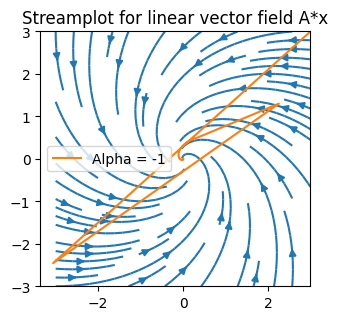

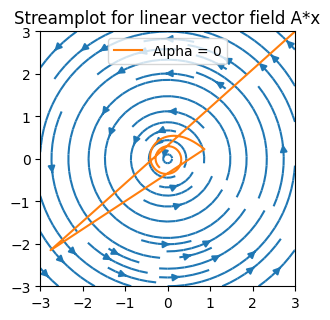

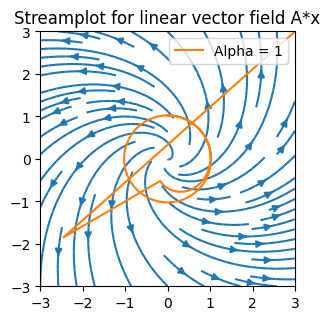

In [26]:
# Define the range of alpha values to visualize
alpha_values = [-1, 0, 1]  # Example alpha values for visualization

# Other constants or matrices needed for the phase diagrams (X, Y, A, etc.)
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
A = np.array([
    [-1, -1],
    [1, -1]
])  # Initial matrix A for phase portrait, to be updated for different alphas

# Initial conditions and time range
y0 = np.array([3, 3])
time = np.linspace(0, 10, 100)

# Iterate over alpha values and plot phase diagrams
for alpha in alpha_values:
    # Update the system matrix A based on alpha
    A = np.array([
        [alpha, -1],
        [1, alpha]
    ])
    
    # Calculate trajectories using Euler's method for the given alpha
    yt, time = solve_euler(lambda y: f_ode(y, alpha), y0, time)
    
    # Plot the phase portrait
    ax = plot_phase_portrait(A, X, Y)
    
    # Plot the trajectory for the given alpha
    ax.plot(yt[:, 0], yt[:, 1], label=f'Alpha = {alpha}')
    
    # Prettify the plot (add legend, titles, etc.)
    ax.legend()
    ax.set_aspect(1)
    
    # Show or save the plot
    plt.show()  # Show each phase diagram individually

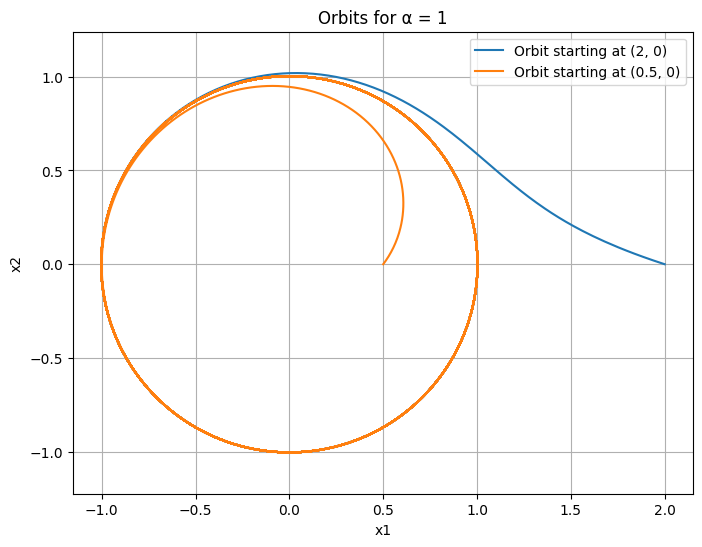

In [27]:
# Initial conditions and time range
y0_1 = np.array([2, 0])
y0_2 = np.array([0.5, 0])
time = np.linspace(0, 100, 10000)  # Small time step

# Other constants or matrices needed for the phase diagrams (X, Y, A...)
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

# Compute orbits using Euler's method
orbit_1, time = solve_euler(lambda y: f_ode(y, 1), y0_1, time)
orbit_2, time = solve_euler(lambda y: f_ode(y, 1), y0_2, time)

# Visualize the orbits
plt.figure(figsize=(8, 6))
plt.plot(orbit_1[:, 0], orbit_1[:, 1], label='Orbit starting at (2, 0)')
plt.plot(orbit_2[:, 0], orbit_2[:, 1], label='Orbit starting at (0.5, 0)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Orbits for α = 1')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

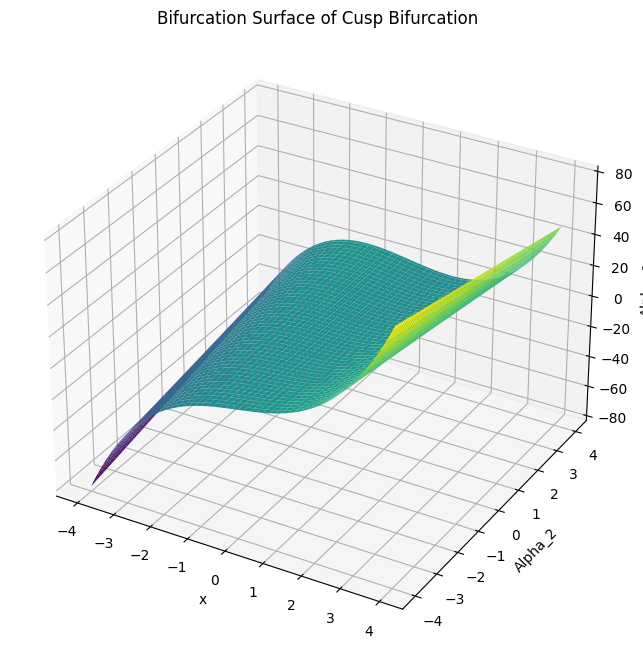

In [28]:
# Sample points (x, alpha_2) uniformly
x_values = np.linspace(-4, 4, 100)
alpha_2_values = np.linspace(-4, 4, 100)
X, ALPHA_2 = np.meshgrid(x_values, alpha_2_values)

# Calculate alpha_1 for each sampled point where x˙ = 0
alpha_1_values = cusp_bifurcation1(ALPHA_2, X)  # Considering x˙ = 0

# Plot the bifurcation surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, ALPHA_2, alpha_1_values, cmap='viridis')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('Alpha_2')
ax.set_zlabel('Alpha_1')
ax.set_title('Bifurcation Surface of Cusp Bifurcation')

plt.show()